# TQSim: Topological Quantum Simulator (Tutorial)
## with Fibonacci anyons

<hr>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\qgate}[1]{ \mathop{\textit{#1} } }$

This is a brief tutorial to implement simple topological quantum circuits with TQSim.

Quantum simulators are very important to understand the behavior of real quantum computers and test quantum algorithms. Since the topological quantum computers do not exist yet, it is convenient to work on a simulator to better understand how quantum computation would look like on a topological quantum computer. For this purpose, CQTech team have designed an open-source simulator in Python to help students and quantum computing enthusiasts to have the opportunity to program a topological quantum simulator.

The main challenging difference between the topological quantum computers and the other quantum computing platforms is the fact that the former is based on the fusion space of anyons which has different structure than the qubits. Therefore, this tutorial will help you practice how the fusion states of anyons is non-trivially split to computational states and non-computational states.

As all quantum simulators, this topological quantum simulator is limited in the number of anyons or qubits that it can simulate in a reasonable time since the fusion space of anyons grows exponentially and the computational work to build braiding matrices, store them and multiply them will be more expansive in case of large number of anyons. Therefore, the topological quantum computation simulator can be work ably up to 12 anyons. For practical purposes, it is better to work with 3 and 4 anyons per qubit as you can deduce from the previous notebooks.

*We highly encourage you to implement your quantum ideas on the topological quantum simulator and provide your feedback. You are also welcome to contribute to the simulator on [GitHub](https://github.com/Constantine-Quantum-Tech/tqsim).*


## Content

1. [Single qubit topological circuit](#100)
    1. [Circuit initialization](#110)
    1. [Braiding](#120)
1. [Multi-qubit topological circuit](#200)

<hr>
<a id="100"></a>

## 1. Single Qubit Topoligical Circuit

<a id="110"></a>

### Circuit initialization

To simulate a topological quantum circuit, TQSim offers the **AnyonicCircuit** class which lets you easily create a circuit of topological qudits made of Fibonacci anyons. So we start by importing it from tqsim.

*Note: we will also import LaTex from IPython for later use.*

In [1]:
from tqsim import AnyonicCircuit
from IPython.display import Latex  # Needed to print LaTeX outputs

We then create a circuit by specifying the number of qudits it contains, and the number of anyons that make each qudit. The circuit will thus contain $N_{qudits} \times N_{anyons/qudit}$ anyons in total.

In the example bellow, we will create 1 qudit that is made of 3 anyons.

In [24]:
# Creating a topological quantum circuit
circuit = AnyonicCircuit(nb_qudits=1, nb_anyons_per_qudit=3)

<div class="alert alert-block alert-info"> <b>Note: </b> The qudit is a quantum state of $d$ complex components eg. $\left(\begin{array}{c}1\\ 0\\ 0\end{array}\right)$. The qubit is a quantum state of $2$ complex components eg. $\left(\begin{array}{c}1\\ 0\end{array}\right)$.</div>

As shown above, _AnyonicCircuit_ has two parameters:
1. _nb\_qudits_ : which is the number of qudits in the circuit.
2. _nb\_anyons\_per\_qudit_ : which is the number of anyons per qudit, typically 3 or 4.

By default, *AnyonicCircuit()* will create 1 qudit with 3 anyons. So we could have created the same circuit using:

In [25]:
circuit = AnyonicCircuit()  # Using the default values.

Now that we have our circuit we may choose to initialize it in a given state. By default, the circuit is initialized in the 1st qudit state.<br>
In our example, our single qudit has a dimension of 3. We can check this using the *dim* property of the circuit.

In [26]:
print('This circuit can encode', circuit.dim, 'possible basis states.')

This circuit can encode 3 possible basis states.


We can see what these states are by printing the circuit basis.

In [27]:
circuit.basis

[{'qudits': [[1, 0]], 'roots': []},
 {'qudits': [[0, 1]], 'roots': []},
 {'qudits': [[1, 1]], 'roots': []}]

These are the 3 basis states that this circuit can encode. We will ignore the *roots* for now and focus on the qudits.

For each basis state, *'qudits'* contains the states of all the qudits in the circuit. Since we only have 1 qudit in our circuit, each basis state only has 1 qudit.<br>

A single 3-anyons qudit is represented by its successive fusion outcomes $i$ and $j$. (see the [Anyons](tqc/B00_Anyons.ipynb) notebook)

        1 1 1 
        \/  / 
        i\ / 
          \    
          j\   

Each qudit in the basis states above encodes $i$ and $j$ in a list that contains both values. Therefor, we may read the output of *circuit.basis* as follows:

* **[[1, 0]] $\rightarrow$ basis[0]** : a 1 qudit state where $i=1$ and $j=0$. This is the non-computational state $\ket{NC}$.
* **[[0, 1]] $\rightarrow$ basis[1]** : a 1 qudit state where $i=0$ and $j=1$. This is the basis state $\ket{0}$.
* **[[1, 1]] $\rightarrow$ basis[2]** : a 1 qudit state where $i=1$ and $j=1$. This is the basis state $\ket{1}$.

Since the circuit is initialized by default in the first basis state, our single qudit is thus in the state $\ket{NC}$, which is not useful to us. To change that, we will initialize the circuit in the $\ket{0}$ basis state.

<div class="alert alert-block alert-info"> <b>Note: </b>
From now on, we will call our basis states <i><b>qubits</b></i>, since we will always only consider $\ket{0}$ and $\ket{1}$ as our computational states.
</div>

In [28]:
circuit.initialize([0,1,0])

We now have a circuit with a single qubit in the $\ket{0}$ state, and we can start doing some computations on it.

<hr>
<a id="120"></a>

### Braiding

In TQC, we change the state of a qubit by braiding its constituent anyons. Braiding can be done in two directions: clockwise or counterclockwise.

We can braid any pair of adjacent anyons in the clockwise direction using the *braid(n, m)* method, where $n < m$.

In [29]:
# Applying clockwise braiding operations
circuit.braid(1, 2)  # On the 1st and 2nd anyons
circuit.braid(2, 3)  # On the 2nd and 3rd anyons

The *draw()* method allows us to draw the anyons world lines, where the arrow of time points to the right, and the anyons are arange from bottom to top.

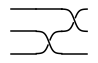

In [30]:
# Drawing the braiding circuit
circuit.draw()

We can see how the first braiding operation acts on the first pair of anyons (bottom), and the second braiding operation acts on the second pair of anyons (top).

To braid them in a counterclockwise direction, we just flip the order of anyons such that $n > m$.

In [31]:
### Apply counter-clockwise braiding operations
circuit.braid(2, 1)  # On the 2nd and 1st anyons
circuit.braid(3, 2)  # On the 3rd and 2nd anyons

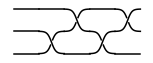

In [32]:
# Drawing the braiding circuit
circuit.draw()

Braids like these can be confusing to read. But we can keep track of our anyons by coloring them using the circuit *drawer*! The drawer contains the list of all the anyons and their visual properties, such as their colors and labels.

Let's color the 1st anyon in red:

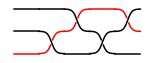

In [33]:
# Highlighting given strands with specific colors
circuit.drawer.anyons[1].color = "red"  # Coloring the 1st anyon in red.
circuit.draw()

We can also label the anyons using the same drawer, but now by setting the label property.

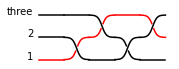

In [34]:
# Labeling the anyons
circuit.drawer.anyons[1].label = 1  # Labeling the 1st anyon using an int
circuit.drawer.anyons[2].label = '2'  # Labeling the 2nd anyon using a number as a string
circuit.drawer.anyons[3].label = 'three'  # Labeling the 3rd anyon using text
circuit.draw()

Once we're done braiding our anyons, we can retrieve the history of all the braiding operations we've performed using the *history()* method. By default, this method returns a list of the raw braiding operations.

In [35]:
# Print the braiding sequences
print('History of braiding operations:', circuit.history())

History of braiding operations: [(2, 1), (3, 2), (1, 2), (2, 3)]


However, a more useful output is the history in terms of braiding operators $\sigma_i$. We can choose the $\LaTeX$ format by passing *\"latex\"* to the *history()* method.

**Note :** we used *Latex()* from *IPython* to display the $\LaTeX$ output.

In [36]:
# Print the braiding sequences in terms of braiding operators
Latex(circuit.history("latex"))

<IPython.core.display.Latex object>

Notice that since this is a product of mathematical operators, ***the first operator will be on the right***!

An even more convinient way to perform braiding operations is to directly use the $\sigma_i$ braiding operators using the *braid_sequence(seq)* method, which takes a sequence of braiding operators and their respective exponents, and applies it to the circuit.

Let's apply the same braid again using this method, but raising all the operators to the 2nd power.

In [37]:
circuit.braid_sequence([[1, 2], [2, 2], [1, -2], [2, -2]])

This method takes a sequence of $[i, p]$, where $i$ is the index of the braiding operator $\sigma_i$, and $p$ is the power to which is raised that operator.

**Note :** the first element of that sequence is the first operation that will be applied! In this case, it is $\sigma_1$.

Now our braid is longer, and is given by the following expression:

In [38]:
Latex(circuit.history("latex"))

<IPython.core.display.Latex object>

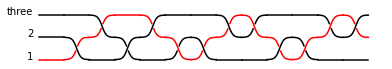

In [39]:
circuit.draw()

As you can see, our braid has now been updated.

<hr>

#### Measurement and Execution

After applying all the necessary braiding on our qubit, the next step is to measure the outcome. This is simply done by called the *measure()* method. In this version of TQSim, this will measure the whole circuit, regardless of the number of qubits/qudits it contains.

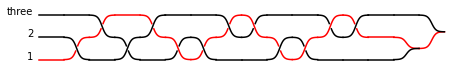

In [40]:
# Measures the circuit by fusing all the anyons
circuit.measure()
circuit.draw()

The measurement is performed by fusing the anyons from the first to last.

At this point, our circuit is complete! We have created a single qubit with three anyons, initialized it in the state $\ket{0}$, performed a quantum operation on it by braiding its anyons, and finally, we have measured its outcome. However, we haven't executed this circuit yet. So none of the previous steps have been carried out.

To execute the topological quantum circuit, we use the *run()* method, to which we pass the number of shots. The circuit will then be simulated and measured for *shots*-number of times. This method will also return a Python dictionary containing the counts for each measured state, as well as the individual measurement results.

In [41]:
# Getting the measurement results for a given number of shots
result = circuit.run(shots=100)

The dictionary *result['counts']* contains all the measured states and the number of times each state was observed.

In [42]:
# Showing the counter
print(result['counts'])

{'1': 82, '2': 18}


And *result['memory']* contains every single measurement.

In [43]:
# Showing every measurement
print(result['memory'])

[1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2
 1 1 1 2 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1]


<hr>

#### Unitary representation

At any point in our code, we can take a look at the unitary representation of the quantum circuit by calling the *unitary()* method. In our case, since we have 3 basis states, our unitary matrix will be a $3 \times 3$ matrix.

In [44]:
# Get the unitary of the braiding circuit
print(circuit.unitary())

[[ 1.        +0.j          0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.02786405-0.91830037j -0.24293414-0.3113375j ]
 [ 0.        +0.j          0.24293414-0.3113375j   0.02786405+0.91830037j]]


Reading matrices in this form can be quite challenging. Instead, we can use the *cplot()* function from TQSim to visualize complex matrices using a color map; each complex value being mapped to a color.

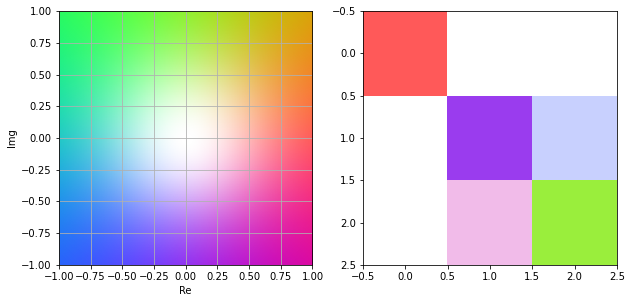

In [45]:
from tqsim import cplot
cplot(circuit.unitary())

<hr>
<a id="200"></a>

## 2. Multi-Qubit Topological Circuit

    Example: nb_qudits = 3, nb_anyons_per_qudit = 3
    
        1 1 1 1 1 1 1 1 1
        \/  / \/  / \/  /
        i\ /  k\ /  e\ /
          \     /     /
          j\  l/     /f
            \ /     / 
            m\     /
              \   /
               \ /
               t|
  
    This state is represented by the following Python dict:
    
        {'qudits': [[i, j], [k, l], [e, f]], 'roots': [m, t]}

In [28]:
circuit = AnyonicCircuit(nb_qudits=2, nb_anyons_per_qudit=4)

In [29]:
circuit.braid(1, 2)
circuit.braid(2, 3)
circuit.braid(3, 4)
circuit.braid(4, 5)
circuit.braid(5, 6)

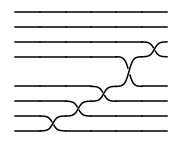

In [30]:
circuit.draw()

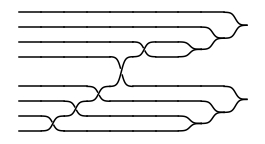

In [31]:
# Measure the fusion circuit
circuit.measure()
circuit.draw()

In [32]:
# The dimension of the basis
circuit.dim

34

In [33]:
# The unitary of the circuit
circuit.unitary()

array([[-0.30901699+0.22451399j, -0.39307569+0.2855862j ,
         0.        +0.j        , ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [-0.39307569+0.2855862j ,  0.30901699-0.22451399j,
         0.        +0.j        , ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
        -0.11803399-0.36327126j, ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       ...,
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , ..., -0.02786405+0.36327126j,
        -0.02786405+0.36327126j,  0.02190536-0.2855862j ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , ...,  0.        +0.j        ,
         0.39918694+0.05300056j,  0.50777363+0.06741776j],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j       

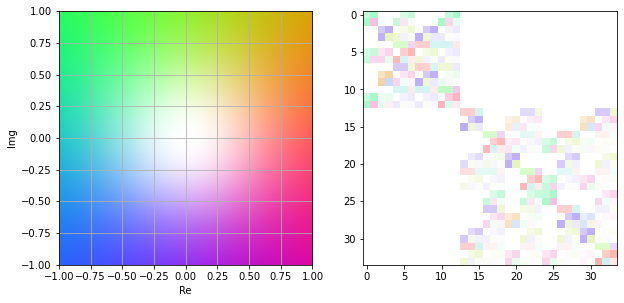

In [34]:
cplot(circuit.unitary())

In [38]:
import numpy as np
# Result of measurement
d = circuit.dim
result = circuit.run(shots=1000)

In [39]:
print(result)

{'counts': {'0': 167, '1': 247, '5': 100, '6': 138, '11': 137, '12': 211}, 'memory': array([ 5,  1,  6,  0, 12, 12,  0,  6,  6, 11,  1,  6, 11, 12,  0,  6,  6,
       12, 11,  0,  6,  6,  0,  1,  1,  0,  5,  1, 12, 12,  0,  5, 12, 11,
        1,  1,  0,  1,  1,  1, 12, 11,  1,  5,  1,  6, 12,  6,  1, 12, 11,
        1,  0,  6, 12, 11, 12, 12,  6,  0,  0,  5, 11, 12,  0,  1,  5, 12,
        1,  6,  6, 11, 12,  6, 11,  5, 11,  1,  1,  1,  6, 11,  0,  5,  1,
        5,  6,  6,  0,  1, 11,  0,  1,  0, 12, 12, 12, 12, 11,  1, 11,  0,
        0,  0,  5, 11, 12,  1, 11,  0,  1,  0,  0,  6, 12,  1, 12, 12,  5,
       12,  1, 12,  0,  6,  0,  5,  0, 12,  1,  5,  0, 12,  1,  5,  1, 11,
        0,  0,  0, 12,  0, 12, 12,  1,  0, 12, 11,  0,  1,  6, 11, 11,  5,
        1,  6, 11, 11,  6,  1,  1, 12,  1, 12, 11, 11,  0,  5,  1, 12,  1,
       12, 12,  5,  1, 12,  5,  1, 11,  1,  0,  1,  5, 11,  5,  5, 12, 12,
        1,  1,  6, 12,  5, 12,  1, 12,  5, 12,  0,  0,  1, 12,  6, 12, 12,
        0,  0, 

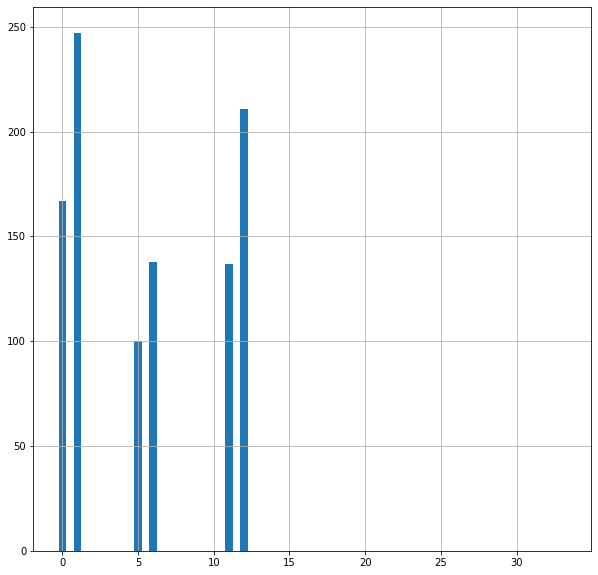

In [40]:
# Show the histogram of measurement results
import matplotlib.pyplot as plt
plt.hist(result['memory'], [ii for ii in range(d+1)], align='left', rwidth=0.5)
plt.grid()
plt.show()

### A Topological Bell Circuit: 

In [68]:
from tqsim import AnyonicCircuit, cplot

circuit = AnyonicCircuit(2, 3)
circuit.initialize([0,1,0,0,0,0,0,0,0,0,0,0,0])

In [69]:
circuit.dim

13

In [70]:
circuit.basis

[{'qudits': [[1, 0], [1, 0]], 'roots': [0]},
 {'qudits': [[0, 1], [0, 1]], 'roots': [0]},
 {'qudits': [[1, 1], [0, 1]], 'roots': [0]},
 {'qudits': [[0, 1], [1, 1]], 'roots': [0]},
 {'qudits': [[1, 1], [1, 1]], 'roots': [0]},
 {'qudits': [[0, 1], [1, 0]], 'roots': [1]},
 {'qudits': [[1, 1], [1, 0]], 'roots': [1]},
 {'qudits': [[1, 0], [0, 1]], 'roots': [1]},
 {'qudits': [[0, 1], [0, 1]], 'roots': [1]},
 {'qudits': [[1, 1], [0, 1]], 'roots': [1]},
 {'qudits': [[1, 0], [1, 1]], 'roots': [1]},
 {'qudits': [[0, 1], [1, 1]], 'roots': [1]},
 {'qudits': [[1, 1], [1, 1]], 'roots': [1]}]

In [71]:
# Hadamard sequence for qudit 1
had_sequence = [[1, 2], [2, 2], [1, -2], [2, -2], [1, 2], [2, 4], [1, -2], [2, 2],
                [1, 2], [2, -2], [1, 2], [2, -2], [1, 4]]

In [72]:
cnot_sequence = [[3, 1], [4, 1], [4, 1], [3, 1], [3, 1], [4, 1], [2, -1], [3, -1], [3, -1], [2, -1], [4, -1], [3, -1], [3, -1], [4, -1], [4, -1], [3, -1], [3, -1], [4, -1], [2, 1], [3, 1], [3, 1], [2, 1], [4, 1], [3, 1], [3, 1], [4, 1], [4, 1], [3, 1], [3, 1], [4, 1], [2, 1], [3, 1], [3, 1], [2, 1], [4, -1], [3, -1], [3, -1], [4, -1], [2, -1], [3, -1], [3, -1], [2, -1], [4, -1], [3, -1], [3, -1], [4, -1], [4, -1], [3, -1], [3, -1], [4, -1], [2, -1], [3, -1], [3, -1], [2, -1], [2, -1], [3, -1], [3, -1], [2, -1], [4, -1], [3, -1], [3, -1], [4, -1], [2, 1], [3, 1], [3, 1], [2, 1], [2, 1], [3, 1], [3, 1], [2, 1], [4, 1], [3, 1], [3, 1], [4, 1], [2, -1], [3, -1], [3, -1], [2, -1], [4, 1], [3, 1], [3, 1], [4, 1], [2, 1], [3, 1], [3, 1], [2, 1], [4, -1], [3, -1], [3, -1], [4, -1], [2, 1], [3, 1], [3, 1], [2, 1], [2, 1], [3, 1], [1, -1], [2, -1], [2, -1], [1, -1], [3, -1], [2, -1], [2, -1], [3, -1], [3, -1], [2, -1], [2, -1], [3, -1], [1, 1], [2, 1], [2, 1], [1, 1], [1, 1], [2, 1], [2, 1], [1, 1], [3, -1], [2, -1], [2, -1], [3, -1], [1, 1], [2, 1], [2, 1], [1, 1], [3, 1], [2, 1], [2, 1], [3, 1], [1, -1], [2, -1], [2, -1], [1, -1], [3, 1], [2, 1], [2, 1], [3, 1], [3, 1], [2, 1], [2, 1], [3, 1], [1, -1], [2, -1], [2, -1], [1, -1], [3, 1], [2, 1], [2, 1], [3, 1], [3, 1], [2, 1], [2, 1], [3, 1], [1, 1], [2, 1], [2, 1], [1, 1], [3, -1], [2, -1], [2, -1], [3, -1], [3, -1], [2, -1], [2, -1], [3, -1], [1, 1], [2, 1], [2, 1], [1, 1], [3, -1], [2, -1], [2, -1], [3, -1], [1, 1], [2, 1], [2, 1], [1, 1], [3, -1], [2, -1], [2, -1], [3, -1], [1, -1], [2, -1], [2, -1], [1, -1], [3, -1], [2, -1], [2, -1], [3, -1], [3, -1], [2, -1], [4, 1], [3, 1], [3, 1], [4, 1], [2, -1], [3, -1], [3, -1], [2, -1], [4, -1], [3, -1], [3, -1], [4, -1], [2, 1], [3, 1], [3, 1], [2, 1], [4, -1], [3, -1], [3, -1], [4, -1], [2, -1], [3, -1], [3, -1], [2, -1], [2, -1], [3, -1], [3, -1], [2, -1], [4, 1], [3, 1], [3, 1], [4, 1], [2, 1], [3, 1], [3, 1], [2, 1], [2, 1], [3, 1], [3, 1], [2, 1], [4, 1], [3, 1], [3, 1], [4, 1], [4, 1], [3, 1], [3, 1], [4, 1], [2, 1], [3, 1], [3, 1], [2, 1], [4, 1], [3, 1], [3, 1], [4, 1], [2, -1], [3, -1], [3, -1], [2, -1], [4, -1], [3, -1], [3, -1], [4, -1], [4, -1], [3, -1], [3, -1], [4, -1], [2, -1], [3, -1], [3, -1], [2, -1], [4, 1], [3, 1], [3, 1], [4, 1], [4, 1], [3, 1], [3, 1], [4, 1], [2, 1], [3, 1], [3, 1], [2, 1], [4, -1], [3, -1], [3, -1], [4, -1], [4, -1], [3, -1]]

In [73]:
# Computing Hadamard for qudit 2
had_sequence_2 = []
for sigma, power in had_sequence:
    had_sequence_2.append([sigma+3, power])

In [74]:
circuit.braid_sequence(had_sequence_2)
circuit.braid_sequence(cnot_sequence)
circuit.measure()

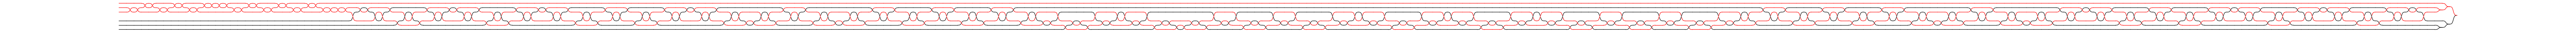

In [75]:
for i in [4,5,6]:
    circuit.drawer.anyons[i].color = 'r'
circuit.draw()

In [79]:
res = circuit.run(shots = 10**6)

In [80]:
print(res['counts'])

{'1': 503082, '3': 4, '4': 496914}


In [81]:
for i in res['counts']:
    print(circuit.basis[int(i)], ':', res['counts'][i])

{'qudits': [[0, 1], [0, 1]], 'roots': [0]} : 503082
{'qudits': [[0, 1], [1, 1]], 'roots': [0]} : 4
{'qudits': [[1, 1], [1, 1]], 'roots': [0]} : 496914
